In [1]:
import scipy.io as reader
from scipy.spatial.distance import cdist
import numpy as np
from IPython.display import Image



In [3]:
#loading data

# train = reader.loadmat('./train_VGG16TrueFalseFalse.mat')['data']
# test = reader.loadmat('./test_VGG16TrueFalseFalse.mat')['data']

# trainAnnotation = reader.loadmat('./trainAnnotationFlickr25k.mat')['trainAnnotation']
testAnnotation = reader.loadmat('./testAnnotationFlickr25k.mat')['testAnnotation']

Score_w_I = reader.loadmat('./scores.mat')['dict']

print(Score_w_I.shape, testAnnotation.shape)

(38, 12500) (12500, 38)


In [4]:
outLabels = ['animals', 'baby', 'baby_r1', 'bird', 'bird_r1', 'car', 'car_r1', 'clouds', 'clouds_r1', 'dog', 'dog_r1', 'female', 'female_r1', 'flower', 'flower_r1', 'food', 'indoor', 'lake', 'male', 'male_r1', 'night', 'night_r1', 'people', 'people_r1', 'plant_life', 'portrait', 'portrait_r1', 'river', 'river_r1', 'sea', 'sea_r1', 'sky', 'structures', 'sunset', 'transport', 'tree', 'tree_r1', 'water']

In [5]:
def indexFinder(name):
    return int(int(name[2:-4])/2) - 1

def computePerf(testAnnotations,Score,annotLabels, outLabels, idx):
    numOfTestImages = testAnnotations.shape[0]
        
    actualLabels = np.array( np.where(testAnnotations[idx, :]==1) )
    currScores1 = Score[:,idx]
    assignedLabels = np.zeros((1,annotLabels))
    for j in range(annotLabels):
        val,indx = np.max(currScores1), np.argmax(currScores1)
        assignedLabels[0][j] = indx
        currScores1[indx] = -np.inf;

    print('actual: ', actualLabels)
    for l in actualLabels[0]:
        print(outLabels[l])
    
    print('\n')
    
    print('assigned: ', assignedLabels)
    for m in assignedLabels[0].astype('int64'):
        print(outLabels[m])


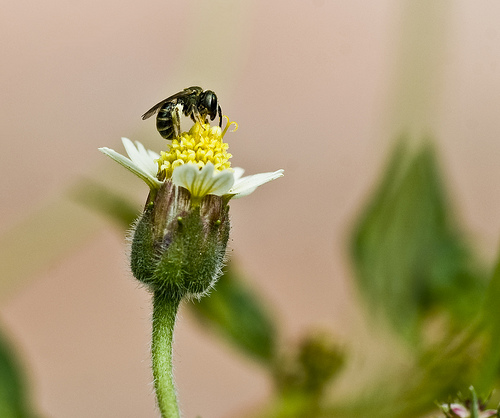

In [6]:
image = "im28.jpg"
Image('./Img2Classify/' + image, width=300, height=300)

In [9]:
performance = computePerf(testAnnotation, Score_w_I, 5, outLabels, indexFinder(image))

actual:  [[ 0 13 14 24]]
animals
flower
flower_r1
plant_life


assigned:  [[13. 24. 14. 35.  3.]]
flower
plant_life
flower_r1
tree
bird
